In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#перевод в dataframe
df_iris = pd.DataFrame(np.column_stack((iris.data, iris.target)), columns = iris.feature_names+['target'])
df_iris['label'] = df_iris.target.replace(dict(enumerate(iris.target_names))) #для сортировки
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   label  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  


In [5]:
#сортировка по двум классам
df_iris_2class = df_iris[df_iris['label'].isin(['versicolor', 'virginica'])]
df_iris_2class.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor


In [6]:
df_iris_2class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    float64
 5   label              100 non-null    object 
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [7]:
#данные для модели
X = df_iris_2class.iloc[:, :-2]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [8]:
#перевод к массиву
X = X.to_numpy(copy=True)
X

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [9]:
#целевая переменная
Y = df_iris_2class['target']
Y.to_numpy(copy=True)
Y

50     1.0
51     1.0
52     1.0
53     1.0
54     1.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 100, dtype: float64

In [10]:
model = LogisticRegression()

In [60]:
#код из лекции по градиентному спуску
EPOCHS = 40
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(5,))

for i in range(EPOCHS):
    predictions = params[0] + np.dot(params[1:], X[i])
    preds.append(predictions)

    cost = np.sum(np.square(preds[i] - Y)) / (2 * len(preds))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(preds[i] - Y) / len(preds)
    params[1] -= LEARNING_RATE * np.sum(np.dot(params[0], X[i])) / len(preds)
    params[2] -= LEARNING_RATE * np.sum(np.dot(params[0], X[i])) / len(preds)
    params[3] -= LEARNING_RATE * np.sum(np.dot(params[0], X[i])) / len(preds)
    params[4] -= LEARNING_RATE * np.sum(np.dot(params[0], X[i])) / len(preds)

In [61]:
params

array([ 1.64290638, -1.35307035, -1.31535993, -1.55307543,  1.14640962])

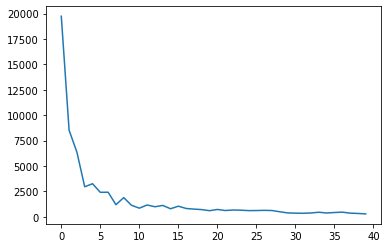

In [62]:
plt.plot(costs)
plt.show()

In [56]:
from matplotlib import pyplot as plt
from math import ceil, floor

In [63]:
#код из статьи
def linear_interpolation(X, idx):
    idx_min = floor(idx)
    idx_max = ceil(idx)
    if idx_min == idx_max or idx_max >= len(X):
        return X[idx_min]
    elif idx_min < 0:
        return X[idx_max]
    else:
        return X[idx_min] + (idx - idx_min)*X[idx_max]

In [64]:
def Nesterov_M(X, gamma = 0.9, lr=0.25):
    Y = []
    v = 0
    for i in range(len(X)):
        v = gamma*v + lr*(linear_interpolation(X, i+gamma*v) if i+gamma*v < len(X) else 0)
        Y.append(v)
    return np.asarray(Y)

def RMSProp(X, gamma = 0.9, lr=0.25, eps=0.00001):
    Y = []
    EG = 0
    for x in X:
        EG = gamma*EG + (1-gamma)*x*x
        v = lr/np.sqrt(EG + eps)*x
        Y.append(v)
    return np.asarray(Y)

In [72]:
Nesterov_M(X)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [66]:
RMSProp(X)

array([[0.79056861, 0.79056555, 0.79056763, 0.79054925],
       [0.54860156, 0.57353786, 0.56158046, 0.59188478],
       [0.48954326, 0.47060101, 0.49957156, 0.48975901],
       [0.36489007, 0.33365749, 0.37765382, 0.38938383],
       [0.39406483, 0.37649308, 0.39616635, 0.40627155],
       [0.3308294 , 0.35467815, 0.36292713, 0.33596626],
       [0.34645114, 0.38488168, 0.3566036 , 0.38169639],
       [0.26730872, 0.27643033, 0.25034303, 0.23963399],
       [0.34214138, 0.32163265, 0.33350626, 0.30325545],
       [0.26740004, 0.29314678, 0.27888869, 0.3156235 ],
       [0.25637641, 0.21986203, 0.2502562 , 0.22758078],
       [0.29573604, 0.31822548, 0.29386943, 0.32750719],
       [0.29424131, 0.2348811 , 0.27639715, 0.22097515],
       [0.29288859, 0.30166919, 0.31414622, 0.3014603 ],
       [0.26679836, 0.29501677, 0.24151318, 0.27644194],
       [0.30959772, 0.30643374, 0.2895323 , 0.29167208],
       [0.25784966, 0.29069134, 0.29032147, 0.30406987],
       [0.26519386, 0.26038648,

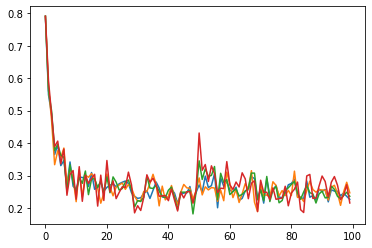

In [67]:
plt.plot(RMSProp(X))
plt.show()

In [75]:
def Adagrad(X, eps, lr=2.5):
    Y = []
    G = 0
    for x in X:
        G += x*x
        v = lr/np.sqrt(G + eps)*x
        Y.append(v)
    return np.asarray(Y)

In [76]:
Adagrad(X, eps=0.00001)

array([[2.49999974, 2.49999878, 2.49999943, 2.49999362],
       [1.68692291, 1.76776652, 1.72892854, 1.827636  ],
       [1.47071057, 1.41283204, 1.50388834, 1.47541662],
       [1.06140426, 0.96669366, 1.10196594, 1.13842465],
       [1.12116966, 1.06476951, 1.13033367, 1.16282508],
       [0.91496665, 0.97961989, 1.01125889, 0.93469524],
       [0.93748338, 1.0481737 , 0.97293681, 1.04505953],
       [0.69998856, 0.72916332, 0.65896753, 0.63194997],
       [0.88218896, 0.83097621, 0.86220364, 0.78047445],
       [0.66965841, 0.73908551, 0.70162042, 0.79668984],
       [0.62355192, 0.53479756, 0.6105906 , 0.55487082],
       [0.70585474, 0.76383613, 0.70313199, 0.78969229],
       [0.68994145, 0.54659437, 0.64684621, 0.51516276],
       [0.6753608 , 0.69233114, 0.72718136, 0.69296728],
       [0.60177354, 0.6672187 , 0.54366027, 0.62315894],
       [0.69185938, 0.68586754, 0.6421777 , 0.64814804],
       [0.5633951 , 0.64151788, 0.63521822, 0.66910955],
       [0.56824307, 0.56255858,

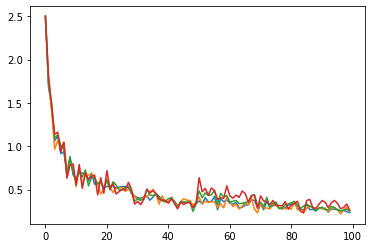

In [77]:
plt.plot(Adagrad(X, eps=0.00001))
plt.show()